In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [278]:
#Importing file csv
df=pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [279]:
#checking is there any null data present or not
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [280]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [281]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [282]:
#Checking the data has null values or not

df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## We are going to check in which field maximum population

In [283]:
d=df.groupby(['job_title']).size().reset_index().rename(columns={0:'Count'})
final_sort=d.sort_values(by='Count',ascending=False).head()
final_sort

,job_title,Count
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16


([<matplotlib.patches.Wedge at 0x2010e5d0c70>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Data Scientist'),
  Text(-1.096433047659817, 0.08851311766854544, 'Data Engineer'),
  Text(0.02819083681447592, -1.0996387028109278, 'Data Analyst'),
  Text(0.9465291360329781, -0.5604307224275488, 'Machine Learning Engineer'),
  Text(1.092457938694234, -0.12859102684070065, 'Research Scientist')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5980543896326274, 0.04827988236466115, '30.8%'),
  Text(0.015376820080623226, -0.5998029288059605, '22.6%'),
  Text(0.5162886196543516, -0.30568948496048115, '9.6%'),
  Text(0.5958861483786729, -0.07014056009492763, '3.7%')])

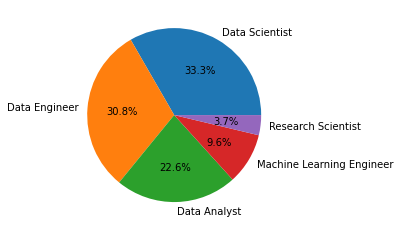

In [284]:
#another method
job=df.job_title.value_counts().index
count=df.job_title.value_counts().values

plt.pie(x=count[:5],labels=job[:5],autopct='%0.1f%%')

## observation :
1. Data scientist and data enhginner has maximum population for the job role

## Top ten job role according to the salary

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

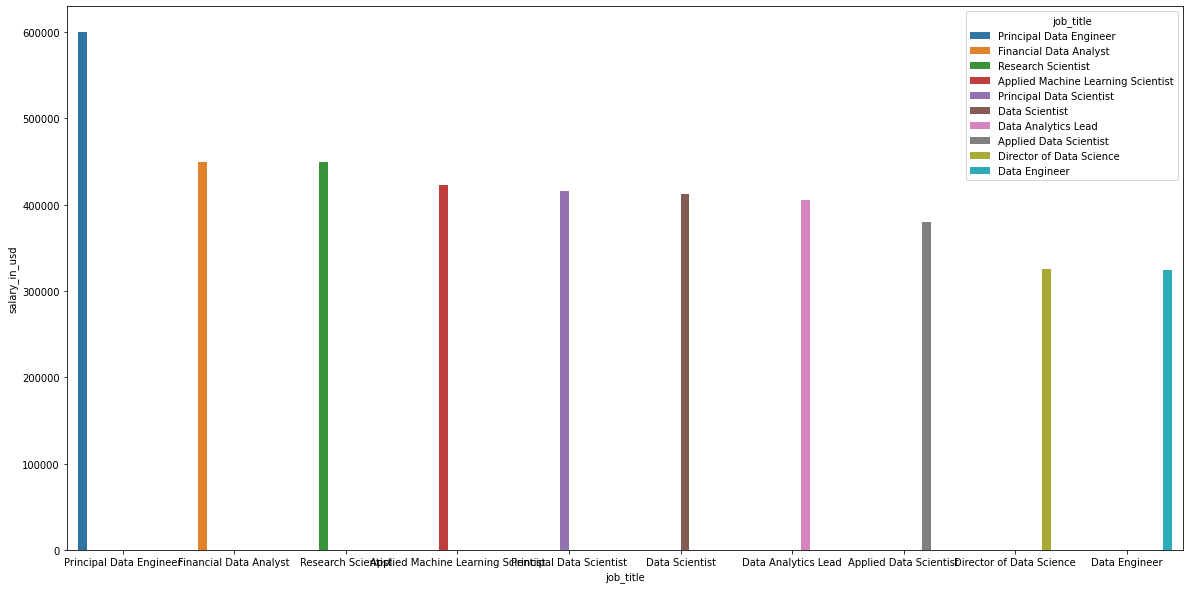

In [285]:
#Top ten salaries job title
plt.figure(figsize=(20,10))
sort=df.sort_values(by='salary_in_usd',ascending=False).head(10)
sns.barplot(x='job_title',y='salary_in_usd',data=sort,hue='job_title')

## Observation:
1. Pricipal Data Engineer has maximum salary 
2. Other remain 9 job profile has approx same range of salary [30000 to 45000]

## Salary currency maximum used

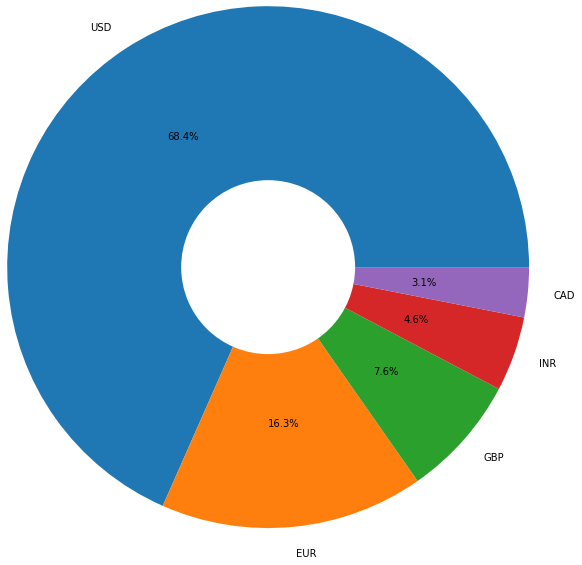

In [286]:
currency=df.salary_currency.value_counts().index
count_cur=df.salary_currency.value_counts().values
plt.pie(x=count_cur[0:5],labels=currency[0:5],autopct='%0.1f%%',radius=3)
plt.pie([10],colors='w',radius=1)
plt.show()

## Observation:
1. Usd dollar is most used currency pair for the salary

## Lets check how many large,midcap, small cap companies are there 

In [287]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [288]:
company_type=df.company_size.value_counts().index
counts_type=df.company_size.value_counts().values
counts_type


array([326, 198,  83], dtype=int64)

In [289]:
df.groupby(['company_size']).size().reset_index()


,company_size,0
0,L,198
1,M,326
2,S,83


<AxesSubplot:>

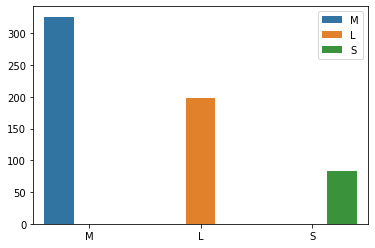

In [290]:
#lets make the bar graph for the visualisation 
sns.barplot(x=company_type,y=counts_type,hue=company_type)

## Observations:
1. M size company has max count

## Lets check from where maximum employee belongs 

In [291]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

<AxesSubplot:>

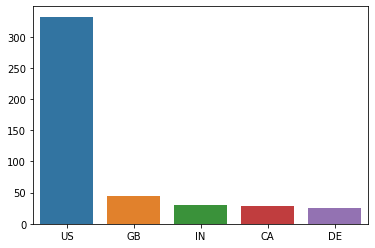

In [292]:

sns.barplot(x=df.employee_residence.value_counts()[:5].index,y=df.employee_residence.value_counts()[:5].values)


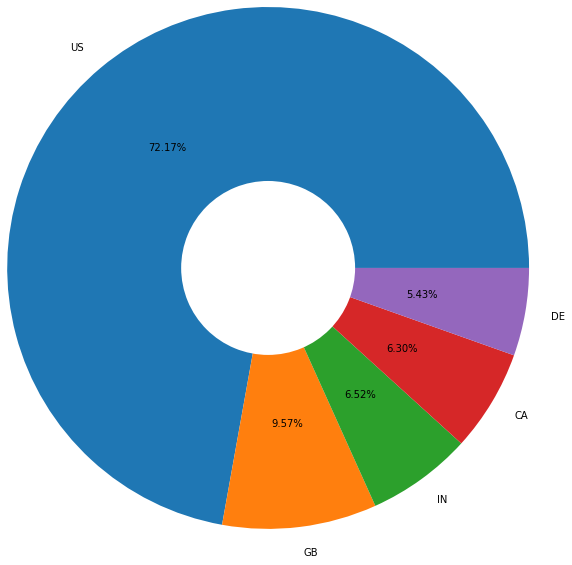

In [293]:
plt.pie(x=df.employee_residence.value_counts()[:5].values,labels=df.employee_residence.value_counts()[:5].index,autopct='%0.2f%%',radius=3)
plt.pie([2],colors='w',radius=1)
plt.show()

## Observation:
1 Maximum employee is from Us that is 70 % population from the entire data 

C:\Users\rjbik\AppData\Local\Temp\ipykernel_4892\1429271892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary_in_usd'])


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

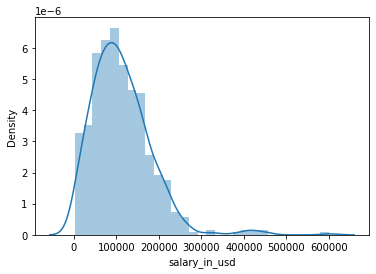

In [294]:
sns.distplot(df['salary_in_usd'])

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

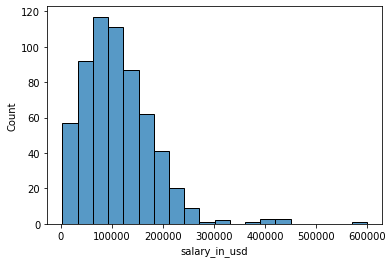

In [295]:
sns.histplot(df['salary_in_usd'],bins=20)

## Observation :
1. Very few people have salary near about 600000
2.Most of the employee salary is range between 90000 to 1500000


In [296]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

## Year wise growth in salaries 

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

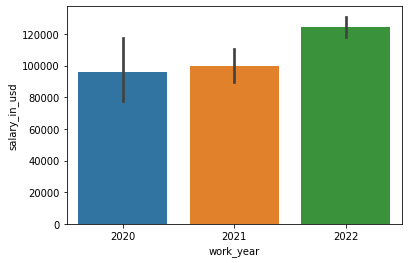

In [297]:
sns.barplot(x="work_year",y='salary_in_usd',data=df)

## Observation:
1. We can see that 2022 has more salary hike in data scientist

## year wise job title salary 

In [298]:
data_2021=df[df['work_year']==2021].groupby(['work_year','job_title','salary_in_usd']).size().reset_index().sort_values(by='salary_in_usd',ascending=False).head()
data_2022=df[df['work_year']==2022].groupby(['work_year','job_title','salary_in_usd']).size().reset_index().sort_values(by='salary_in_usd',ascending=False).head()
data_2020=df[df['work_year']==2020].groupby(['work_year','job_title','salary_in_usd']).size().reset_index().sort_values(by='salary_in_usd',ascending=False).head()





<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

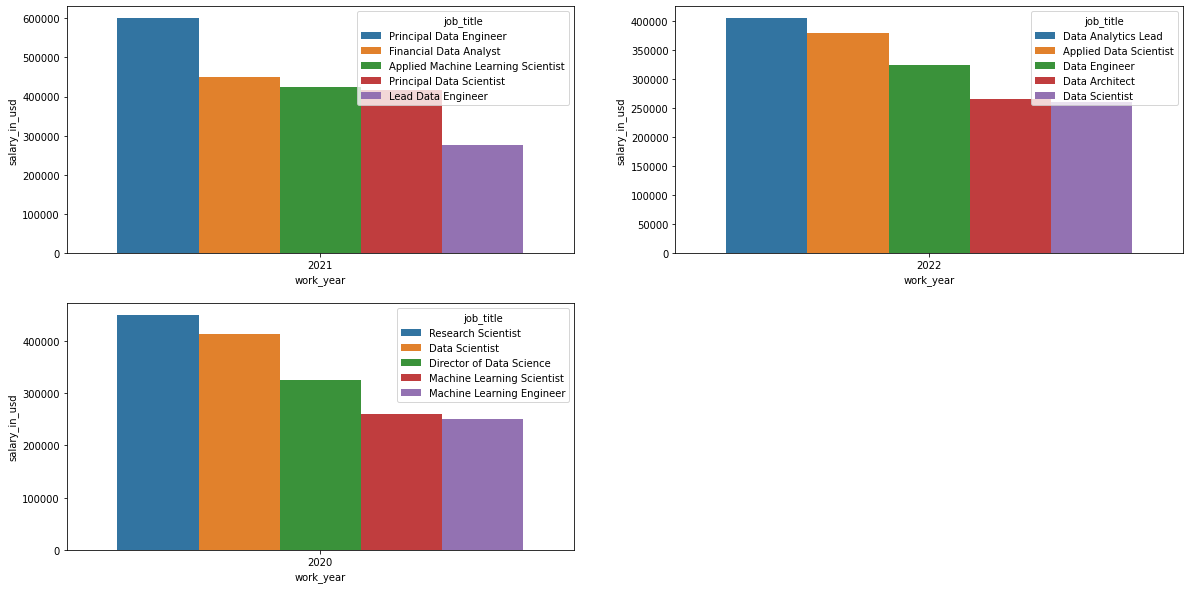

In [299]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='work_year',y='salary_in_usd',hue='job_title',data=data_2021)
plt.subplot(2,2,2)
sns.barplot(x='work_year',y='salary_in_usd',hue='job_title',data=data_2022)
plt.subplot(2,2,3)
sns.barplot(x='work_year',y='salary_in_usd',hue='job_title',data=data_2020)

In [300]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

## How the experience_level w.r.t employee

In [301]:
df.groupby(['experience_level']).size().reset_index()

,experience_level,0
0,EN,88
1,EX,26
2,MI,213
3,SE,280


In [302]:
## Another way for the above
level=df.experience_level.value_counts().index
employe_count=df.experience_level.value_counts().values

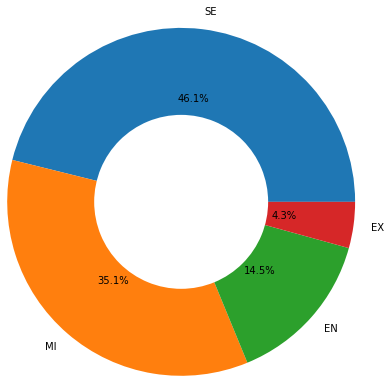

In [303]:
# Drawing pie plot the data 



plt.pie(x=employe_count,labels=level,autopct='%0.1f%%',radius=2)
plt.pie([10],colors='w',radius=1)
plt.show()

## observation :
1. About 47 % of the population has SE position 
2.About 35 % of the population has MI position